# CMS Data Exercise 

## Author Infomation

Name : Darryn Johnson 

Date Last Updated : 2/2/2025

## Sources and Links

Original Dataset : [Payroll Based Journal Daily Nurse Staffing](https://data.cms.gov/quality-of-care/payroll-based-journal-daily-nurse-staffing/data)

Original Health Deficiencies Data : [Health Deficiencies](https://data.cms.gov/provider-data/dataset/r5ix-sfxw)

Safety Code Scope Picture : [chfs.ky.gov](https://www.chfs.ky.gov/agencies/os/oig/dhc/Documents/ScopeSeverityGrid1.pdf)

---
# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

---
# Business Understanding 

The purpose of the following notebook is to look into the data associated with staffing long-term care facilities. The data contains informations such as provider name, data, location data, as well as information regarding deficiencies and the fixes for them.

---
# Data understanding 

The data we will be using is data from [Payroll Based Journal Daily Nurse Staffing](https://data.cms.gov/quality-of-care/payroll-based-journal-daily-nurse-staffing/data) and [Health Deficiencies](https://data.cms.gov/provider-data/dataset/r5ix-sfxw) from [Data.CMS.GOV](https://data.cms.gov/). This data is published quarterly by Medicaid and Medicare containing staffing data for all registered nursing homes in the U.S.

Data set 1 ([Payroll Based Journal Daily Nurse Staffing](https://data.cms.gov/quality-of-care/payroll-based-journal-daily-nurse-staffing/data)) is structered as follows :

- the original dataset contains 1,325,323 rows, with each row representing a specidfic date the data was recorded per provider
- the original dataset contains 33 columns containing informations such as :
    - recorded hours per work type. examples include :
      - RN and CNA hours
    - dates, times and locations for records kept
    - provider names
    - as well as other infomration explored in the notebook

Data set 2 ([Health Deficiencies](https://data.cms.gov/provider-data/dataset/r5ix-sfxw)) is structered as follows :

- the original dataset contains 404,614 rows, with each row representing a specific date a deficiency was found.
- the original dataset contains 23 columns containing infomration such as :
    - the date a deficiency was found, recored and fixed
    - type of deficiency class
    - location
    - name of provider
    - as well as other infomration explored in the notebook

---
# Functions

In [3]:
def scope_sev(df, rating, col):
    data = df
    rating_df = data.loc[data[col] == rating]

    comp_dict = {}

    for ind, row in rating_df.iterrows():
        key = row['State']
        value = row[col]

        if key not in comp_dict:
            comp_dict[key] = 0 
        comp_dict[key] += 1

    sorted_dict = dict(sorted(comp_dict.items(), reverse = True, key = lambda item : item[1]))
    
    if 'CA' in comp_dict:
        state = 'western states'
    else:
        state = 'eastern states'
   
    
    max_ = max(comp_dict, key = comp_dict.get)
    min_ = min(comp_dict, key = comp_dict.get)

    return f'The state with the most {rating} cases in the {state} is {max_}, with the lowest being {min_}'

In [4]:
def scope_perc(df, rating, col, min_max):
    data = df
    rating_df = data.loc[data[col] == rating]

    comp_dict = {}

    for ind, row in rating_df.iterrows():
        key = row['State']
        value = row[col]

        if key not in comp_dict:
            comp_dict[key] = 0 
        comp_dict[key] += 1

    sorted_dict = dict(sorted(comp_dict.items(), reverse = True, key = lambda item : item[1]))
    
    if 'CA' in comp_dict:
        state = 'western states'
    else:
        state = 'eastern states'
   

    if min_max == max:
        max_ = max(comp_dict, key = comp_dict.get)
        max_df = data.loc[data['State'] == max_]
        max_df1 = max_df.loc[max_df['Scope Severity Code'] == rating]
        count = len(max_df1)
        total = len(rating_df)
        percent = round((count / total) * 100, 2)
        var = max_
        return f'{var} has {count} report(s) of {rating} cases, resulting in taking up {percent}% of total {rating} cases'
    
    else:
        min_ = min(comp_dict, key = comp_dict.get)
        min_df = data.loc[data['State'] == min_]
        min_df1 = min_df.loc[min_df['Scope Severity Code'] == rating]
        count = len(min_df1)
        total = len(rating_df)
        percent = round((count / total) * 100, 2)
        var = min_
        return f'{var} has {count} report(s) of {rating} cases, resulting in taking up {percent}% of total {rating} cases'

In [102]:
def hours_calc(df, h1, h2):
    df_ = df

    dict_ = {}

    for col in df_.columns:
        dict_[col] = df_[col].sum()

    sorted_dict = dict(sorted(dict_.items(), reverse = True, key = lambda item : item[1]))
    
    for key in dict_:
        if key == h1:
            comp1 = dict_.get(key)
    for key in dict_:
        if key == h2:
            comp2 = dict_.get(key)
    
    perc = round((comp2 / comp1) * 100, 2)
    percent = f'{perc:,}'

    comp1_r = round(comp1, 2)
    comp2_r = round(comp2, 2)
    
    comp_1 = f'{comp1_r:,}'
    comp_2 = f'{comp2_r:,}'

    count = abs(comp1_r - comp2_r)
    rounded = round(count,2)
    abs_ = f'{rounded:,}'
    
    return f'{h1} has {comp_1} hours on record, while {h2} has {comp_2} hours. This is a {abs_} ({percent} %) difference.'

In [84]:
def plot_hours(df, state):
    
    '''
    this function takes in 2 values, what data frame to use and what column to use to plot.
    this function will automatically order them in decending order (bottom to top) as well as auto color them based on pre-determened coloring
    per company name. if a company were to be added to the data frame, it will not have an assigned color and will most likely cause an error 
    when calling the function. add company to below area marked as "company color assignment" in color_map
    ---
    requirments : df(str) & col(str)
    ---
    '''
    
    # df variable assignment
    df_ = df
    dict_ = {}

    # creates a dictionary that assigns the name of a company to the key and the given column value to value
    for col in df_.columns:
        dict_[col] = df_[col].sum()

    # sort created dictionary (descending) 
    sorted_dict = dict(sorted(dict_.items(), reverse = True, key = lambda item : item[1]))
    
    # extract key/values
    k = list(sorted_dict.keys())
    v = list(sorted_dict.values())
    
    fig, ax = plt.subplots()
    plt.barh(k, v)
    ax.get_xaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels
    ax.tick_params(axis = 'x', labelrotation = 45)
    plt.title(f'Hours Per Job Title in {state}')
    ax.set_xlabel('Hours')
    plt.show();    

---
# Exploritory Data Analysis

In [5]:
df = pd.read_csv('PBJ_Daily_Nurse_Staffing_Q2_2024.zip', encoding = 'Latin-1', low_memory = False)

In [6]:
df.head(2)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,10.77,0.0,10.40,10.40,0.0,55.70,55.70,0.0,0.0,0.0,0.0,25.50,25.50,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,8.43,0.0,18.25,18.25,0.0,63.28,63.28,0.0,0.0,0.0,0.0,15.22,15.22,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325324 entries, 0 to 1325323
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1325324 non-null  object 
 1   PROVNAME          1325324 non-null  object 
 2   CITY              1325324 non-null  object 
 3   STATE             1325324 non-null  object 
 4   COUNTY_NAME       1325324 non-null  object 
 5   COUNTY_FIPS       1325324 non-null  int64  
 6   CY_Qtr            1325324 non-null  object 
 7   WorkDate          1325324 non-null  int64  
 8   MDScensus         1325324 non-null  int64  
 9   Hrs_RNDON         1325324 non-null  float64
 10  Hrs_RNDON_emp     1325324 non-null  float64
 11  Hrs_RNDON_ctr     1325324 non-null  float64
 12  Hrs_RNadmin       1325324 non-null  float64
 13  Hrs_RNadmin_emp   1325324 non-null  float64
 14  Hrs_RNadmin_ctr   1325324 non-null  float64
 15  Hrs_RN            1325324 non-null  float64
 16  

In [8]:
health = pd.read_csv('NH_HealthCitations_Nov2024.csv', low_memory = False)

In [9]:
health.head(2)

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Survey Date,Survey Type,Deficiency Prefix,Deficiency Category,Deficiency Tag Number,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Infection Control Inspection Deficiency,Citation under IDR,Citation under IIDR,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2023-03-02,Health,F,Infection Control Deficiencies,880,Provide and implement an infection prevention ...,F,"Deficient, Provider has date of correction",2023-04-06,1,Y,N,N,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2024-11-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2023-03-02,Health,F,Resident Assessment and Care Planning Deficien...,656,Develop and implement a complete care plan tha...,J,Past Non-Compliance,2023-01-13,1,Y,Y,N,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2024-11-01


In [10]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404615 entries, 0 to 404614
Data columns (total 23 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   CMS Certification Number (CCN)           404615 non-null  object
 1   Provider Name                            404615 non-null  object
 2   Provider Address                         404615 non-null  object
 3   City/Town                                404615 non-null  object
 4   State                                    404615 non-null  object
 5   ZIP Code                                 404615 non-null  int64 
 6   Survey Date                              404615 non-null  object
 7   Survey Type                              404615 non-null  object
 8   Deficiency Prefix                        404615 non-null  object
 9   Deficiency Category                      404615 non-null  object
 10  Deficiency Tag Number                    404

In [11]:
df.rename(columns = {'WorkDate' : 'Date'}, inplace = True)

In [12]:
health.rename(columns = {'Survey Date' : 'Date'}, inplace = True)

In [13]:
health['Date'] = pd.to_datetime(health['Date'])

In [14]:
df3 = df.join(health, how = 'left', lsuffix = 'Date', rsuffix = 'Date')

In [15]:
df3.head(2)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,DateDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,DateDate,Survey Type,Deficiency Prefix,Deficiency Category,Deficiency Tag Number,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Infection Control Inspection Deficiency,Citation under IDR,Citation under IIDR,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,10.77,0.0,10.40,10.40,0.0,55.70,55.70,0.0,0.0,0.0,0.0,25.50,25.50,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653.0,2023-03-02,Health,F,Infection Control Deficiencies,880.0,Provide and implement an infection prevention ...,F,"Deficient, Provider has date of correction",2023-04-06,1.0,Y,N,N,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2024-11-01
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,8.43,0.0,18.25,18.25,0.0,63.28,63.28,0.0,0.0,0.0,0.0,15.22,15.22,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653.0,2023-03-02,Health,F,Resident Assessment and Care Planning Deficien...,656.0,Develop and implement a complete care plan tha...,J,Past Non-Compliance,2023-01-13,1.0,Y,Y,N,N,N,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2024-11-01


In [16]:
df3.drop('STATE', axis = 1, inplace = True)

In [17]:
df3.dropna(inplace = True)

---
# Scope Severity Code

Here we will take a look into the `Scope Severity Code`, which gives a code to signify the type of issues found within an audit. These codes work on a scale of 3, which means the first 3 letters are `A, B, C`, all under level 1 deficiency. Level 1 dificiency is no actual harm with potential for minimal harm. Each letter represents a level of _spread_ for the level its on, with `A` meaning isolated, `B` meaning pattern, and `C` meaning widespread. The rest of the code follows this pattern with a level going up every 3 letters. 

Here we will take a look into the states that have the worst rating `L`. The lowest rating is `A`, however this rating does not appear in the dataset. With the data we have, `B` is the least severe rating we have. 

In [18]:
df3['Scope Severity Code'].value_counts()

Scope Severity Code
D    249589
E     93100
F     27390
G     13175
J      6092
B      5348
C      4867
K      2254
L       750
H       570
I        35
Name: count, dtype: int64

In [19]:
west_states_list = ['CA', 'NV', 'OR', 'WA', 'ID', 'UT', 'AZ', 'NM', 'CO', 'WY', 'MT', 'ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'LA', 'AR', 'MO', 'IA',
                   'MN', 'MS', 'IL', 'HI']

In [20]:
east_states_list = ['WI', 'Al', 'TN', 'KY', 'IN', 'MI', 'FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'OH', 'PA', 'MD', 'DE', 'NJ', 'NY', 'CT', 'RI', 'MA',
                    'NH', 'VT', 'ME', 'AK']

In [21]:
west_states = df3.loc[df3['State'].isin(west_states_list)]

In [22]:
east_states = df3.loc[df3['State'].isin(east_states_list)]

## Western States

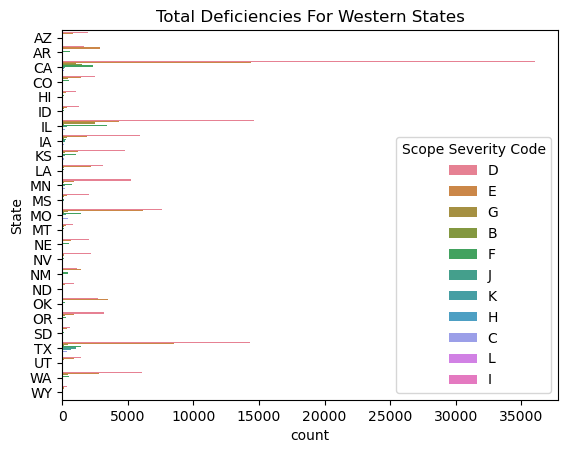

In [93]:
sns.countplot(data = west_states, y = 'State', hue = 'Scope Severity Code')
plt.title('Total Deficiencies For Western States')
plt.show();

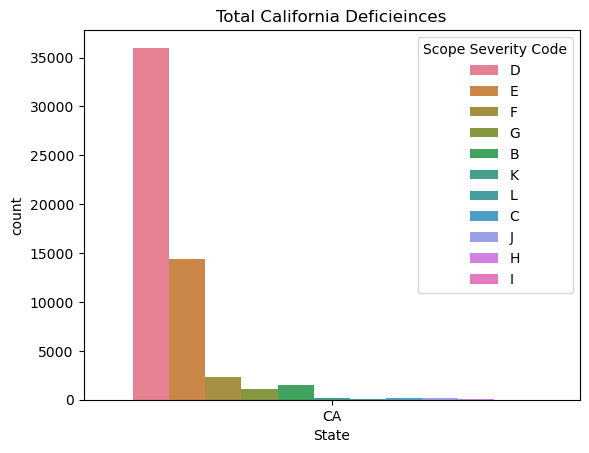

In [90]:
fig, ax = plt.subplots()
cal_df = west_states.loc[west_states['State'] == 'CA']
sns.countplot(data = cal_df, x = 'State', hue = 'Scope Severity Code')
plt.title('Total California Deficieinces')
plt.show();

In [25]:
cal_df['Scope Severity Code'].value_counts()

Scope Severity Code
D    36005
E    14393
F     2319
B     1539
G     1061
J      226
K      145
C      135
L       98
H       58
I        1
Name: count, dtype: int64

In [26]:
scope_sev(west_states, 'L', 'Scope Severity Code')

'The state with the most L cases in the western states is CA, with the lowest being AR'

In [27]:
scope_perc(west_states, 'L', 'Scope Severity Code', max)

'CA has 98 report(s) of L cases, resulting in taking up 26.42% of total L cases'

In [28]:
scope_perc(west_states, 'L','Scope Severity Code', min)

'AR has 1 report(s) of L cases, resulting in taking up 0.27% of total L cases'

In [29]:
scope_perc(west_states, 'D','Scope Severity Code', max)

'CA has 36005 report(s) of D cases, resulting in taking up 29.1% of total D cases'

In [30]:
scope_perc(west_states, 'D','Scope Severity Code', min)

'WY has 364 report(s) of D cases, resulting in taking up 0.29% of total D cases'

## Eastern States

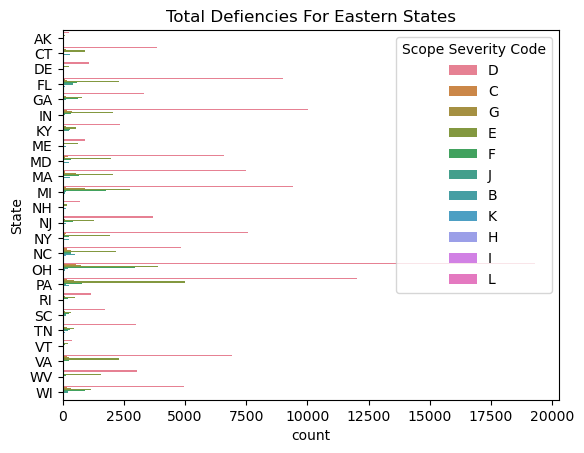

In [92]:
sns.countplot(data = east_states, y = 'State', hue = 'Scope Severity Code')
plt.title('Total Defiencies For Eastern States')
plt.show();

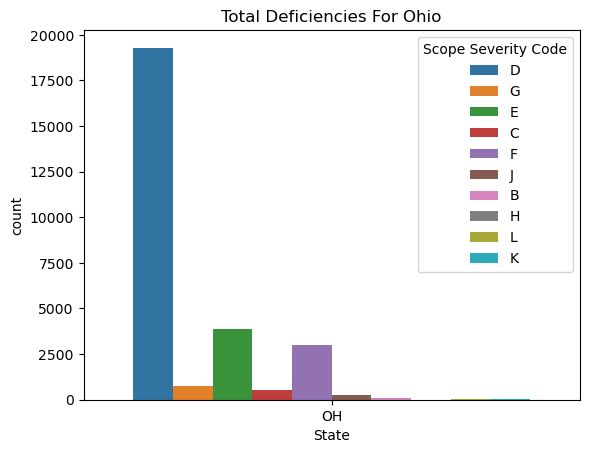

In [94]:
fig, ax = plt.subplots()
oh_df = east_states.loc[east_states['State'] == 'OH']
sns.countplot(data = oh_df, x = 'State', hue = 'Scope Severity Code')
plt.title('Total Deficiencies For Ohio')
plt.show();

In [33]:
scope_sev(east_states, 'L', 'Scope Severity Code')

'The state with the most L cases in the eastern states is NJ, with the lowest being CT'

In [34]:
scope_perc(east_states, 'L', 'Scope Severity Code', max)

'NJ has 49 report(s) of L cases, resulting in taking up 13.92% of total L cases'

In [35]:
scope_perc(east_states, 'L', 'Scope Severity Code', min)

'CT has 1 report(s) of L cases, resulting in taking up 0.28% of total L cases'

In [36]:
scope_perc(east_states, 'D', 'Scope Severity Code', max)

'OH has 19292 report(s) of D cases, resulting in taking up 15.6% of total D cases'

In [37]:
scope_perc(east_states, 'D', 'Scope Severity Code', min)

'AK has 255 report(s) of D cases, resulting in taking up 0.21% of total D cases'

---
# Contract Hours


Let's take a look into the hours worked by contractors vs. hours worked by employees of the facility.

In [39]:
df_hours = df.iloc[:, 9:]

In [40]:
df_hours.head()

,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,10.77,10.77,0.0,10.40,10.40,0.0,55.70,55.70,0.0,0.0,0.0,0.0,25.50,25.50,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.43,8.43,0.0,18.25,18.25,0.0,63.28,63.28,0.0,0.0,0.0,0.0,15.22,15.22,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.13,11.13,0.0,12.08,12.08,0.0,76.29,76.29,0.0,0.0,0.0,0.0,5.46,5.46,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.27,12.27,0.0,17.53,17.53,0.0,54.13,54.13,0.0,0.0,0.0,0.0,20.18,20.18,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.95,4.95,0.0,17.42,17.42,0.0,53.63,53.63,0.0,0.0,0.0,0.0,27.85,27.85,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


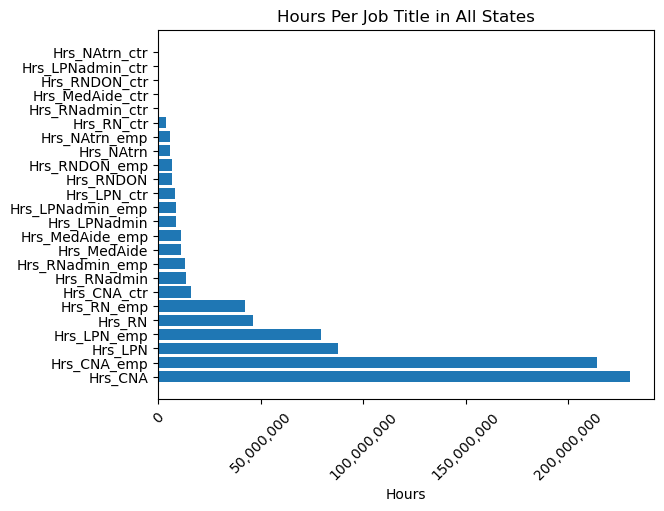

In [86]:
plot_hours(df_hours, 'All States')

Here we can see that an overwhelming majority or hours are classified as `Hrs_CNA_emp` or hours for cna employees.

In [46]:
hours_calc(df_hours, 'Hrs_CNA_ctr', 'Hrs_CNA_emp')

'Hrs_CNA_ctr has 16,144,430.91 hours on record, while Hrs_CNA_emp has 214,184,634.72 hours. This is a 198,040,203.81 (1,326.68 %) difference.'

Here we can see that there is a huge difference betweeen the hours worked by CNA staff and CNA contractors. Let's look into another staff vs contractor difference to see what information we can gain.

In [48]:
hours_calc(df_hours, 'Hrs_LPN_ctr', 'Hrs_LPN_emp')

'Hrs_LPN_ctr has 8,128,793.7 hours on record, while Hrs_LPN_emp has 79,571,106.86 hours. This is a 71,442,313.16 (978.88 %) difference.'

Once again we can see that there is a stark contrast between the amount of hours worked by contractors vs employees.

Let's look into the hours for the top two states that have the most reported issues.

In [49]:
cal_df = df3.loc[df3['State'] == 'CA']

In [53]:
cal_hours = cal_df.iloc[:, 9:32]

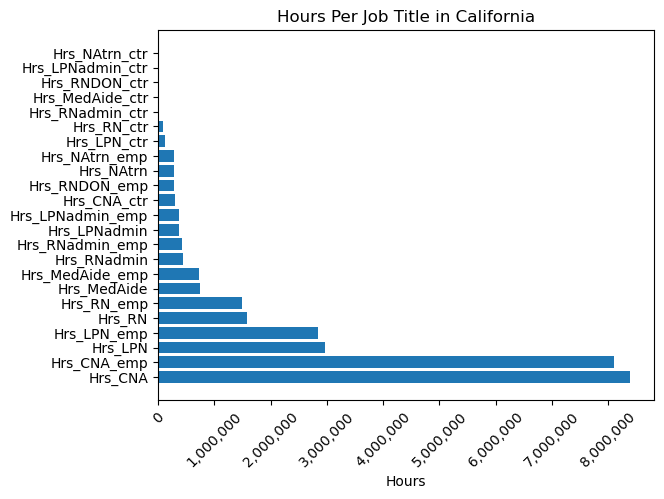

In [87]:
plot_hours(cal_hours, 'California')

In [103]:
hours_calc(cal_hours, 'Hrs_CNA_ctr', 'Hrs_CNA_emp')

'Hrs_CNA_ctr has 296,788.17 hours on record, while Hrs_CNA_emp has 8,103,288.81 hours. This is a 7,806,500.64 (2,730.33 %) difference.'

In [104]:
hours_calc(cal_hours, 'Hrs_LPN_ctr', 'Hrs_LPN_emp')

'Hrs_LPN_ctr has 121,885.35 hours on record, while Hrs_LPN_emp has 2,849,782.54 hours. This is a 2,727,897.19 (2,338.08 %) difference.'

In [96]:
oh_df = df3.loc[df3['State'] == 'OH']

In [97]:
oh_hours = oh_df.iloc[:, 9:32]

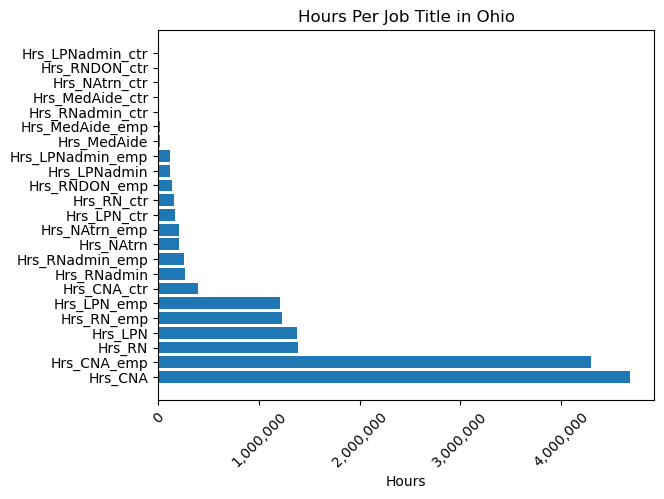

In [98]:
plot_hours(oh_hours, 'Ohio')

In [105]:
hours_calc(oh_hours, 'Hrs_CNA_ctr', 'Hrs_CNA_emp')

'Hrs_CNA_ctr has 392,337.79 hours on record, while Hrs_CNA_emp has 4,297,931.82 hours. This is a 3,905,594.03 (1,095.47 %) difference.'

In [106]:
hours_calc(oh_hours, 'Hrs_LPN_ctr', 'Hrs_LPN_emp')

'Hrs_LPN_ctr has 170,519.8 hours on record, while Hrs_LPN_emp has 1,206,135.86 hours. This is a 1,035,616.06 (707.33 %) difference.'

---
# Recommendation 1
## Ensuring the Quality of Contractors

With the data showing distinct areas that are high in the `L` Scope Severity Code, we can clearly see that these areas need major attention, as this code signifies widespread immediate jeopardy to the residence health and safety. While mistakes do occur, as we are human, widespread pattern deficiencies are not human error, rather a lack of training, lack of care in the workspace, sinister intent, or all of the above. This can be a product of the contractors from _Clipboard Health_ or the full time employees on location. If the issue resided with the contractors, immediate suspension of the contractor may be necessary until a further investigation can be conducted to identify what is causing the issues with that specific individual. If _Clipboard Health_ is to be the best of the best, it may be a viable business move to incentivize personal growth of the contractors, with continued education being rewarded and reviwes from the facilities on individuals being a core aspect of the process. A rating from the facility on top of the _Clipboard Score_ could give more insight into an individual. A person who alwyas shows up to work can still be a bad employee. If _Clipboard Health_ contractors are not the cause of the issue, they can still make an impact on the facilities care for residence. With an `initiative and persistence` mindset, contractors can themselves be the beacon of light that residence look towards, always being the best version of themselves, even if the workplace fights against that motive. Having reliable employees that always do whats right and always has the resident first is the easiets and most effective way for the company to grow, as building a reliable repuation is extremely important. 

When it comes to specifc locations that have a high reporing of consistant issues, It may also be important to look into where the responsable individuals were trained, as this could lead to a pattern of low quality contractors consistently being recruited from the same institutions. This can drastically effect the ability for _Clipboard Health_ to aquire new facilities as customers, as word of mouth is a viable (and free) advertising strategy.

---
# Recommendation 2
## Pain Point System

Within the _ClipBoard Health App_, I propose a contractor self identifying system, where a contractor can identify strenghts they possess, allowing for when facilities place a shift opening they can also put a tag on it that states a pain point they are currently having. This can send notifications to contractors that have that tag as a srength, allowing for a better match between contractors and facilities. This can be a major selling point for when creating partnerships with facilities as this apears to be an blind spot that _Clipboard Health_ can use to better suit the needs of facilities.

---
# Recommendation 3